<a href="https://colab.research.google.com/github/aayushh04/dlt/blob/main/week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.87MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.5MB/s]


Epoch [1/5], Loss: 165.0864
Epoch [2/5], Loss: 121.2797
Epoch [3/5], Loss: 114.4795
Epoch [4/5], Loss: 111.5908
Epoch [5/5], Loss: 109.7997


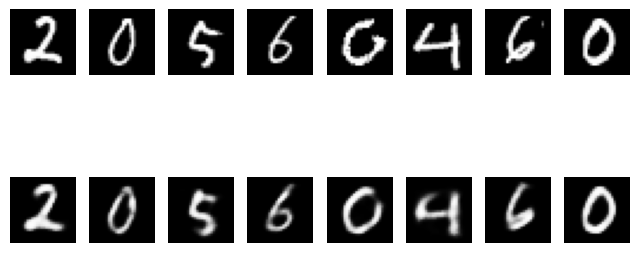

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# -------------------------
# 1. Load MNIST dataset
# -------------------------
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# -------------------------
# 2. Define Encoder & Decoder
# -------------------------
latent_dim = 20

class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 400)
        self.fc_mu = nn.Linear(400, latent_dim)
        self.fc_logvar = nn.Linear(400, latent_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(latent_dim, 400)
        self.fc2 = nn.Linear(400, 28*28)

    def forward(self, z):
        z = torch.relu(self.fc1(z))
        return torch.sigmoid(self.fc2(z))

# -------------------------
# 3. VAE Model
# -------------------------
class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decoder(z)
        return recon, mu, logvar

# -------------------------
# 4. Loss Function
# -------------------------
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# -------------------------
# 5. Train the VAE
# -------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vae = VAE().to(device)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

for epoch in range(5):
    vae.train()
    total_loss = 0
    for x, _ in train_loader:
        x = x.view(-1, 28*28).to(device)
        optimizer.zero_grad()
        recon, mu, logvar = vae(x)
        loss = loss_function(recon, x, mu, logvar)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()
    print(f"Epoch [{epoch+1}/5], Loss: {total_loss/len(train_loader.dataset):.4f}")

# -------------------------
# 6. Visualize Reconstruction
# -------------------------
vae.eval()
with torch.no_grad():
    x, _ = next(iter(train_loader))
    x = x.view(-1, 28*28).to(device)
    recon, _, _ = vae(x)
    plt.figure(figsize=(8, 4))
    for i in range(8):
        plt.subplot(2, 8, i+1)
        plt.imshow(x[i].cpu().view(28, 28), cmap='gray')
        plt.axis('off')
        plt.subplot(2, 8, 8+i+1)
        plt.imshow(recon[i].cpu().view(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()


Epoch [1/10], Loss: 165.3361
Epoch [2/10], Loss: 122.2821
Epoch [3/10], Loss: 115.0990
Epoch [4/10], Loss: 112.0945
Epoch [5/10], Loss: 110.2943
Epoch [6/10], Loss: 109.1105
Epoch [7/10], Loss: 108.2011
Epoch [8/10], Loss: 107.5047
Epoch [9/10], Loss: 106.9896
Epoch [10/10], Loss: 106.5227


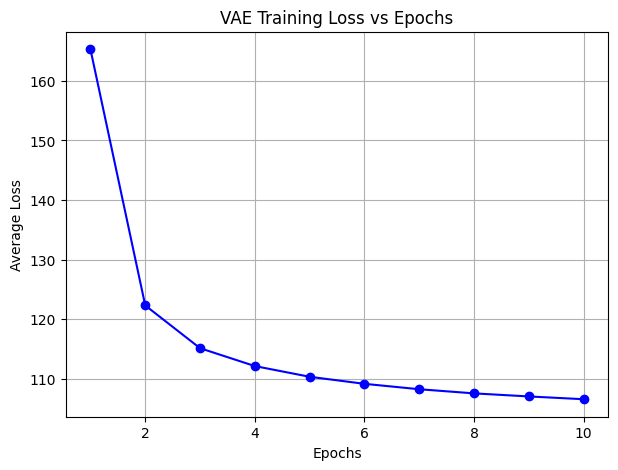

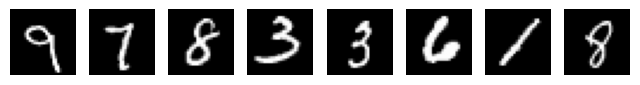

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# -------------------------
# 1. Load MNIST dataset
# -------------------------
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# -------------------------
# 2. Define Encoder & Decoder
# -------------------------
latent_dim = 20

class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 400)
        self.fc_mu = nn.Linear(400, latent_dim)
        self.fc_logvar = nn.Linear(400, latent_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(latent_dim, 400)
        self.fc2 = nn.Linear(400, 28*28)

    def forward(self, z):
        z = torch.relu(self.fc1(z))
        return torch.sigmoid(self.fc2(z))

# -------------------------
# 3. VAE Model
# -------------------------
class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decoder(z)
        return recon, mu, logvar

# -------------------------
# 4. Loss Function
# -------------------------
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# -------------------------
# 5. Train the VAE
# -------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vae = VAE().to(device)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

num_epochs = 10
loss_list = []

for epoch in range(num_epochs):
    vae.train()
    total_loss = 0
    for x, _ in train_loader:
        x = x.view(-1, 28*28).to(device)
        optimizer.zero_grad()
        recon, mu, logvar = vae(x)
        loss = loss_function(recon, x, mu, logvar)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()
    avg_loss = total_loss / len(train_loader.dataset)
    loss_list.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# -------------------------
# 6. Plot Loss vs Epoch
# -------------------------
plt.figure(figsize=(7,5))
plt.plot(range(1, num_epochs+1), loss_list, marker='o', color='b')
plt.title("VAE Training Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.grid(True)
plt.show()

# -------------------------
# 7. Visualize Reconstruction
# -------------------------
vae.eval()
with torch.no_grad():
    x, _ = next(iter(train_loader))
    x = x.view(-1, 28*28).to(device)
    recon, _, _ = vae(x)
    plt.figure(figsize=(8, 4))
    for i in range(8):
        plt.subplot(2, 8, i+1)
        plt.imshow(x[i].cpu().view(28, 28), cmap='gray')
        plt.axis('off')
